In [1]:
import pandas as pd
from scripts.preprocessing import load_data,clean_df,tokenize,train_test

In [2]:
# df = load_data()
# df.head()

In [3]:
# df['Rejoined_review'] = df['Tokenized_review'].apply(lambda x: " ".join(x))
# df.head()

In [4]:
df = pd.read_csv('data/processed_data.csv')

In [5]:
x_train, x_test, y_train, y_test = train_test(df,x_column='Rejoined_review',y_column='Grade')

In [6]:
df.to_csv('data/processed_data.csv', index=False)

In [7]:
from scripts.visualization import wordCloud_generator

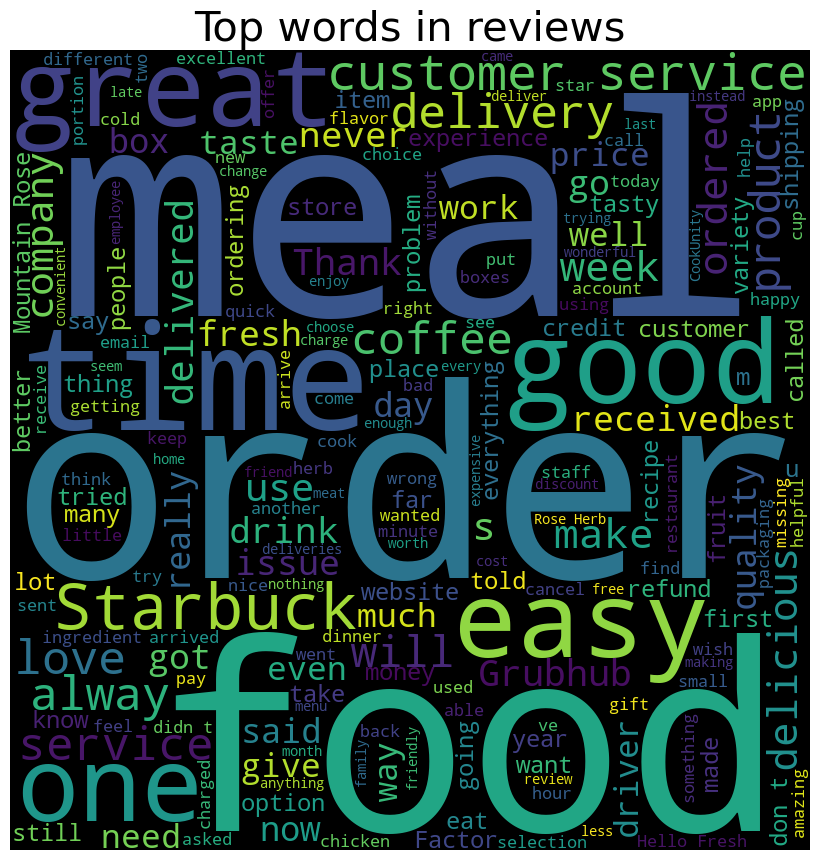

In [8]:
wordCloud_generator(df['Review'], title="Top words in reviews")

In [9]:
from tensorflow.keras.utils import to_categorical

X = df['Review'].copy()
y = df['Grade'].copy()

encoding = {
    1: 0,
    2: 1,
    3: 2,
    4: 3,
    5: 4
}

labels = ['1', '2', '3', '4', '5']
           
y = df['Grade'].copy()
y.replace(encoding, inplace=True)
y = to_categorical(y,5)

In [10]:
apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [11]:
import numpy as np 
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import string

nlp = spacy.load('en_core_web_sm',disable=['parser','ner'])
stop = stopwords.words('english')

def cleanData(reviews):
    all_=[]
    for review in reviews:
        lower_case = review.lower() #lower case the text
        lower_case = lower_case.replace(" n't"," not") #correct n't as not
        lower_case = lower_case.replace("."," . ")
        lower_case = ' '.join(word.strip(string.punctuation) for word in lower_case.split()) #remove punctuation
        words = lower_case.split() #split into words
        words = [word for word in words if word.isalpha()] #remove numbers
        split = [apposV2[word] if word in apposV2 else word for word in words] #correct using apposV2 as mentioned above
        split = [appos[word] if word in appos else word for word in split] #correct using appos as mentioned above
        split = [word for word in split if word not in stop] #remove stop words
        reformed = " ".join(split) #join words back to the text
        doc = nlp(reformed)
        reformed = " ".join([token.lemma_ for token in doc]) #lemmatiztion
        all_.append(reformed)
    df_cleaned = pd.DataFrame()
    df_cleaned['clean_reviews'] = all_
    return df_cleaned['clean_reviews']

X_cleaned = cleanData(X)
X_cleaned.head()

0    owe money meal half empty cold since dec make ...
1    order last night give delivery time early time...
2    careful money steal deliver joke company promi...
3    bad customer service never receive request ref...
4    awful customer service past month face issue o...
Name: clean_reviews, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, stratify=y, random_state=42,test_size=0.1)

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
max_length = max([len(x) for x in X_train])
vocab_size = len(tokenizer.word_index) + 1
print("Max length of sentence: {}".format(max_length))
X_train = pad_sequences(X_train, max_length ,padding='post')

Max length of sentence: 422


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.layers import Bidirectional,Embedding,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
embedding_vector_length=32
num_classes = 5
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_length,input_length=X_train.shape[1]))
model.add(Bidirectional(LSTM(250,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint('../model/model.h5', save_best_only=True, 
                             save_weights_only=False)]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 422, 32)           240320    
                                                                 
 bidirectional (Bidirection  (None, 422, 500)          566000    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 422, 500)          0         
                                                                 
 flatten (Flatten)           (None, 211000)            0         
                                                                 
 dense (Dense)               (None, 128)               27008128  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [15]:
history = model.fit(X_train, y_train, validation_split=0.11, 
                    epochs=4, batch_size=32, verbose=1,
                    callbacks=callbacks)

Epoch 1/4
152/152 [==============================] - ETA: 0s - loss: 1.5634 - accuracy: 0.5703

c:\Users\tboug\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


152/152 [==============================] - 535s 4s/step - loss: 1.5634 - accuracy: 0.5703 - val_loss: 0.9453 - val_accuracy: 0.6656
Epoch 2/4
152/152 [==============================] - 575s 4s/step - loss: 0.8809 - accuracy: 0.6913 - val_loss: 0.9216 - val_accuracy: 0.6572
Epoch 3/4
152/152 [==============================] - 616s 4s/step - loss: 0.7397 - accuracy: 0.7156 - val_loss: 0.8799 - val_accuracy: 0.6772
Epoch 4/4
152/152 [==============================] - 608s 4s/step - loss: 0.6426 - accuracy: 0.7487 - val_loss: 0.8957 - val_accuracy: 0.6755


Text(0.5, 1.0, 'Training and Validation accuracy')

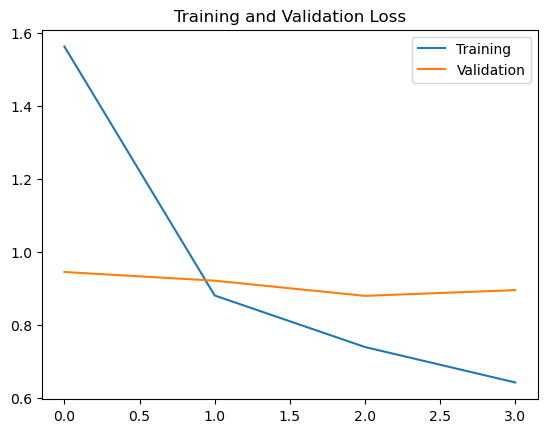

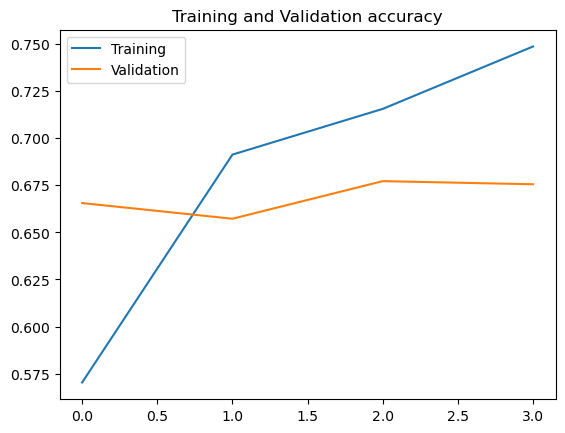

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')

In [17]:
X_test_token = tokenizer.texts_to_sequences(X_test)
X_test_token = pad_sequences(X_test_token, max_length ,padding='post')
pred = model.predict(X_test_token)
pred = to_categorical(pred,5)

19/19 [==============================] - 8s 405ms/step


In [20]:
from sklearn.metrics import classification_report,accuracy_score
print('Test Accuracy: {}'.format(accuracy_score([x[0] for x in pred], y_test)))
print(classification_report(y_test, [x[0] for x in pred], target_names=labels))

Test Accuracy: 0.2026359143327842
              precision    recall  f1-score   support

           1       0.20      1.00      0.34       123
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        56
           4       0.00      0.00      0.00        75
           5       0.00      0.00      0.00       320

   micro avg       0.20      0.20      0.20       607
   macro avg       0.04      0.20      0.07       607
weighted avg       0.04      0.20      0.07       607
 samples avg       0.20      0.20      0.20       607



c:\Users\tboug\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('trustpilot_en_50_page.csv')

reviews = df['Review'].apply(lambda x: x.lower())
grades = df['Grade']

vectorizer = TfidfVectorizer()
reviews_tfidf = vectorizer.fit_transform(reviews)

x_train, x_test, y_train, y_test = train_test_split(reviews_tfidf, grades, test_size=0.2, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.5115321252059308


In [ ]:
import pickle

def load_and_predict(input_data, model_name = 'random forest'):

    if model_name == 'neural network':
        path = 'model2.pkl'
    else:
        path = 'random_forest_model.pkl'

    with open(path, 'rb') as file:
        model = pickle.load(file)

    with open('vectorizer.pkl', 'rb') as file:
        vectorizer = pickle.load(file)
    
    data = vectorizer.transform(input_data)
    
    prediction = model.predict(data)
    
    return prediction